In [ ]:
import pandas as pd
data=pd.read_csv('/content/latestdata.csv')
data1=pd.read_csv('/content/devnewdata_2.csv')

In [ ]:
data['label']=data['label']-1
data1['label']=data1['label']-1
data.to_csv('/content/latestdata.csv')
data1.to_csv('/content/devnewdata_2.csv')

In [2]:
!pip install pytorch_lightning

     |████████████████████████████████| 524 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 36.9 MB/s 
     |████████████████████████████████| 829 kB 36.4 MB/s 
     |████████████████████████████████| 329 kB 43.0 MB/s 
     |████████████████████████████████| 132 kB 47.6 MB/s 
     |████████████████████████████████| 1.1 MB 33.2 MB/s 
     |████████████████████████████████| 160 kB 44.9 MB/s 
     |████████████████████████████████| 192 kB 50.4 MB/s 
     |████████████████████████████████| 271 kB 43.3 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=54c98d69c6f2d74d70726ab8642a237f299ef46eaa808ecd1c4dbe156d0e1a61
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found exis

In [3]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 61 kB 471 kB/s 
     |████████████████████████████████| 3.3 MB 33.1 MB/s 
     |████████████████████████████████| 895 kB 48.9 MB/s 


In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/latestdata.csv  --DEV_FILE /content/latestdata.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/latestdata.csv', TRAIN_FILE='/content/latestdata.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.seq_relationship.bias', 'cls.seq_relationship

In [10]:
import pandas as pd
ep0 = pd.read_csv('/content/epoch_0_predictions.csv')
ep1 = pd.read_csv('/content/epoch_1_predictions.csv')
ep2 = pd.read_csv('/content/epoch_2_predictions.csv')
ep3 = pd.read_csv('/content/epoch_3_predictions.csv')
ep4 = pd.read_csv('/content/epoch_4_predictions.csv')

In [11]:
import numpy as np
difficulty = []
confidence = [] 
for i in range(1954):
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))

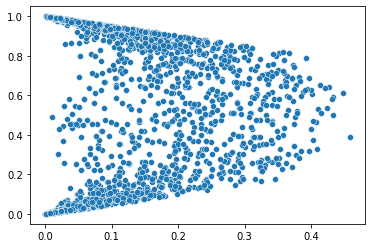

In [12]:
import seaborn as sns
sns.scatterplot(x= difficulty, y = confidence)

In [13]:
confidence_sorted_indices = sorted(range(len(confidence)),key=confidence.__getitem__)

In [12]:
confidence[confidence_sorted_indices[300]]

0.625493910908699

In [13]:

import pandas as pd
train_df = pd.read_csv('/content/latestdata.csv')

In [14]:
data_easy = train_df.iloc[confidence_sorted_indices[1500:]]
data_ambi = train_df.iloc[confidence_sorted_indices[300:1500]]
data_hard = train_df.iloc[confidence_sorted_indices[:300]]

In [15]:
data_easy.to_csv('/content/data_easy.csv')
data_ambi.to_csv('/content/data_ambi.csv')
data_hard.to_csv('/content/data_hard.csv')


In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/data_easy.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/data_easy.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.decoder.weight', 'cls.seq_relati

<Figure size 640x480 with 0 Axes>

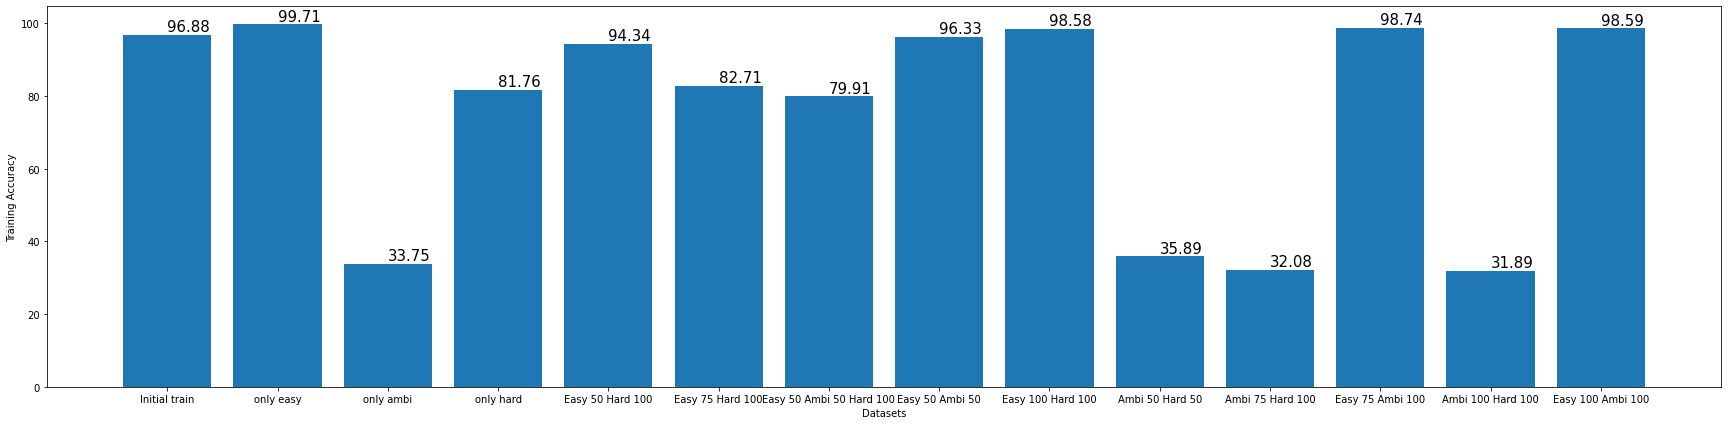

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
x = ('Initial train', 'only easy', 'only ambi', 'only hard','Easy 50 Hard 100','Easy 75 Hard 100','Easy 50 Ambi 50 Hard 100','Easy 50 Ambi 50','Easy 100 Hard 100','Ambi 50 Hard 50','Ambi 75 Hard 100','Easy 75 Ambi 100','Ambi 100 Hard 100','Easy 100 Ambi 100')
y = (96.88, 99.71, 33.75, 81.76,94.34,82.71,79.91,96.33,98.58,35.89,32.08,98.74,31.89,98.59)
plt.figure(figsize=(30,7))
plt.bar(x,y,width=0.8,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Training Accuracy')

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

<Figure size 640x480 with 0 Axes>

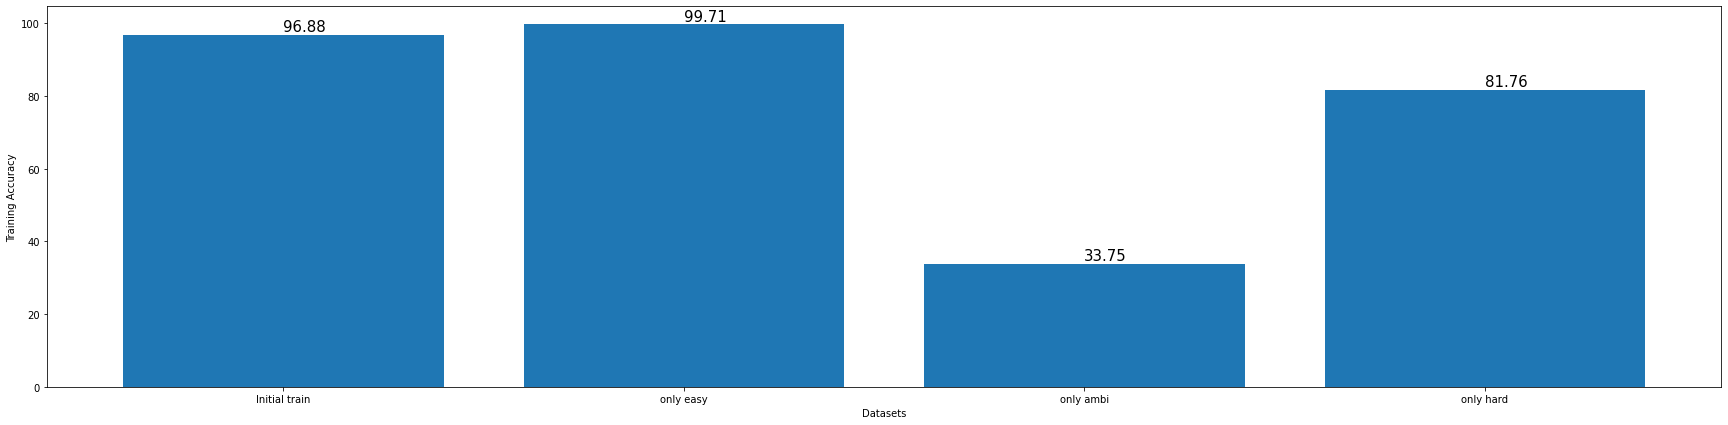

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
x = ('Initial train', 'only easy', 'only ambi', 'only hard')
y = (96.88, 99.71, 33.75, 81.76)
plt.figure(figsize=(30,7))
plt.bar(x,y,width=0.8,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Training Accuracy')

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

<Figure size 640x480 with 0 Axes>

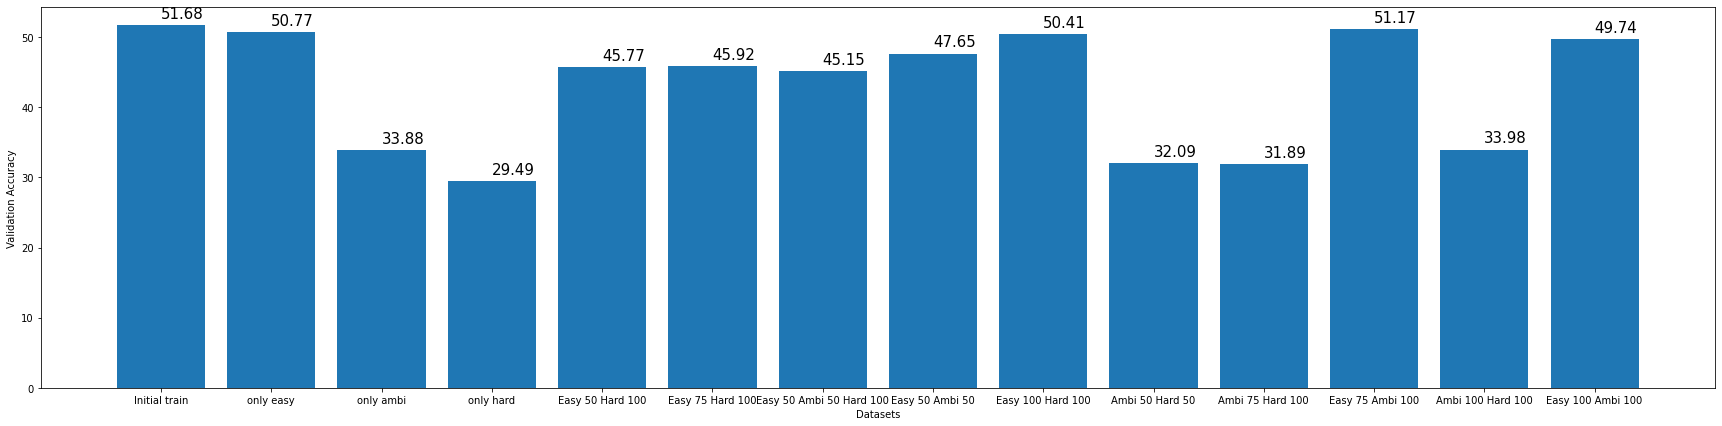

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
x = ('Initial train', 'only easy', 'only ambi', 'only hard','Easy 50 Hard 100','Easy 75 Hard 100','Easy 50 Ambi 50 Hard 100','Easy 50 Ambi 50','Easy 100 Hard 100','Ambi 50 Hard 50','Ambi 75 Hard 100','Easy 75 Ambi 100','Ambi 100 Hard 100','Easy 100 Ambi 100')
y = (51.68, 50.77, 33.88, 29.49,45.77,45.92,45.15,47.65,50.41,32.09,31.89,51.17,33.98,49.74)
len(x)
len(y)
plt.figure(figsize=(30,7))
plt.bar(x,y,width=0.8,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Validation Accuracy')

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

<Figure size 640x480 with 0 Axes>

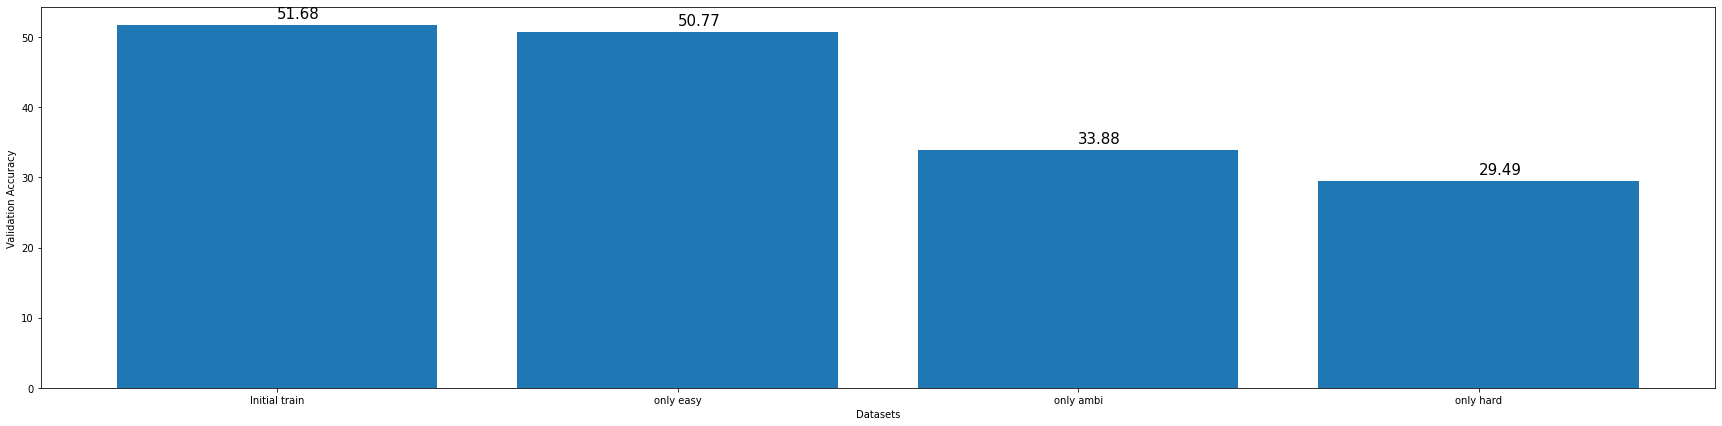

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
x = ('Initial train', 'only easy', 'only ambi', 'only hard')
y = (51.68, 50.77, 33.88, 29.49)
plt.figure(figsize=(30,7))
plt.bar(x,y,width=0.8,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Validation Accuracy')

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.show()

In [5]:
import pandas as pd
train_df_easy = pd.read_csv('/content/data_easy.csv')
train_df_ambi = pd.read_csv('/content/data_ambi.csv')
train_df_hard = pd.read_csv('/content/data_hard.csv')

In [6]:
train_easy_50_hard_100 = pd.concat([train_df_easy.iloc[:1750], train_df_hard])

In [7]:
train_easy_50_hard_100.to_csv('train_easy_50_hard_100.csv')

In [8]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_easy_50_hard_100.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_easy_50_hard_100.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.decoder.weight', 'c

In [9]:
train_easy_50_ambi_50 = pd.concat([train_df_easy.iloc[:1750], train_df_ambi.iloc[:600]])
train_easy_50_ambi_50.to_csv('train_easy_50_ambi_50.csv')

In [ ]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_easy_50_ambi_50.csv  --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_easy_50_ambi_50.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.transform.dense.bias

In [24]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_ambi_50_hard_50.csv --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_ambi_50_hard_50.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.transform.dense.bias

In [25]:
train_ambi_100_hard_100 = pd.concat([train_df_ambi, train_df_hard])
train_ambi_100_hard_100.to_csv('train_ambi_100_hard_100.csv')

In [26]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/train_ambi_100_hard_100.csv --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/train_ambi_100_hard_100.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.seq_relationship.bias', 'cls.p

In [4]:
!python3 /content/mcq_training_lightning_1.py --model_name_or_path bert-base-uncased --hidden_dropout_prob 0.15 --max_input_seq_length 128 --output_dir ./  --predictions_file predictions.csv --TRAIN_FILE /content/latestdata.csv --DEV_FILE /content/devnewdata_2.csv --train_batch_size 8 --eval_batch_size 8 --max_train_samples -1 --num_train_epochs 5 --gradient_accumulation_steps 1 --seed 42 --save_top_k -1 --learning_rate 5e-05 --write_dev_predictions

Training arguments Namespace(adam_epsilon=1e-08, distributed_backend=None, early_stop_callback=False, fp_16=False, max_grad_norm=1.0, n_gpu=-1, num_workers=8, opt_level='O1', warmup_steps=0, weight_decay=0.0)
--------------------
Model arguments Namespace(hidden_dropout_prob=0.15, max_input_seq_length=128, model_name_or_path='bert-base-uncased')
--------------------
Other arguments Namespace(DEV_FILE='/content/devnewdata_2.csv', TRAIN_FILE='/content/latestdata.csv', do_fast_dev_run=False, eval_batch_size=8, gradient_accumulation_steps=1, learning_rate=5e-05, limit_train_batches=-1, limit_val_batches=-1, max_train_samples=-1, num_train_epochs=5, output_dir='./', predictions_file='predictions.csv', save_last=False, save_top_k=-1, seed=42, train_batch_size=8, write_dev_predictions=True)
--------------------
Global seed set to 42
Downloading: 100% 28.0/28.0 [00:00<00:00, 34.2kB/s]
Downloading: 100% 570/570 [00:00<00:00, 518kB/s]
Downloading: 100% 226k/226k [00:00<00:00, 1.64MB/s]
Downloadi